## Agenda:

1. Train/implement Linear Regression on a synthetic dataset (without using Sklearn).
2. Train/implement Linear Regression on the Insurance dataset using Sklearn, along with exploratory data analysis.
3. Train/implement Logistic Regression on a synthetic dataset, both without using Sklearn and using Sklearn.



# Perceptron-Based Linear Regression model

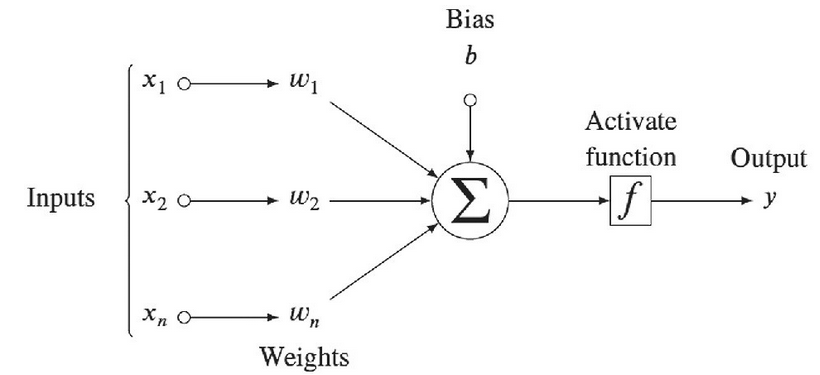

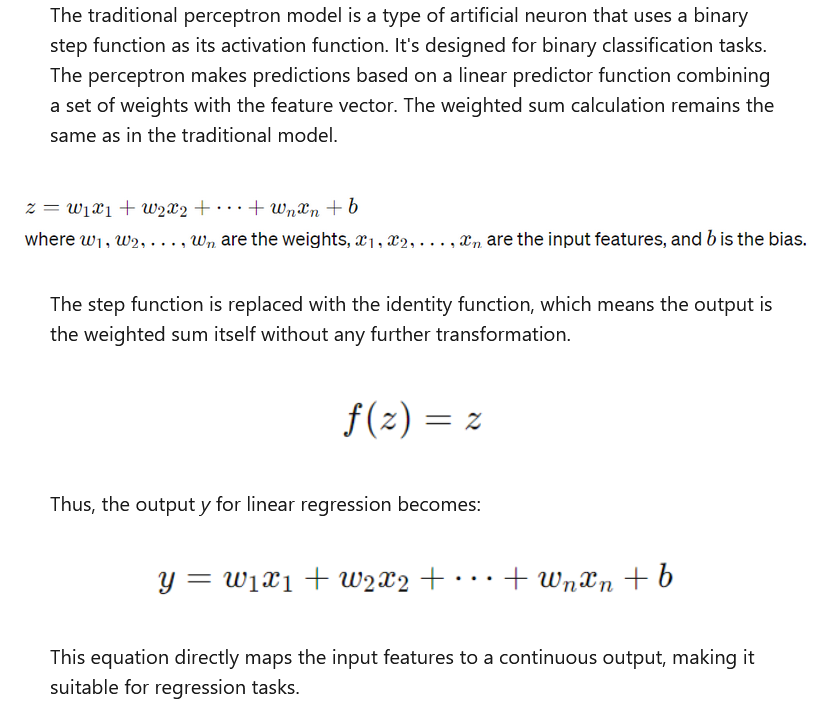

## Steps:

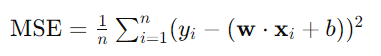

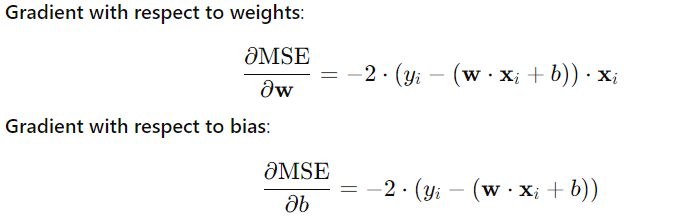

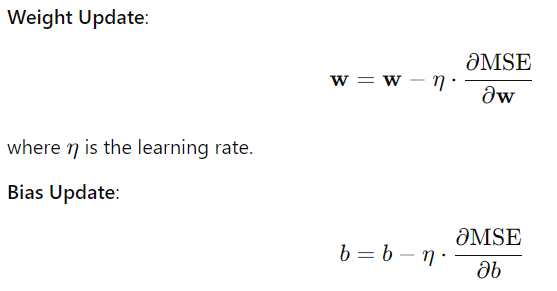

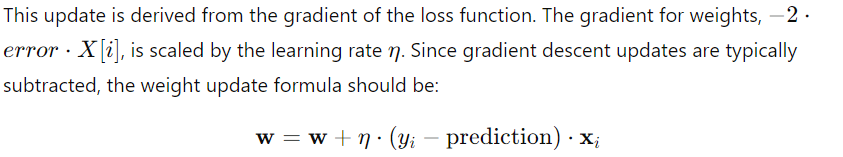

### 1. Train/implement Linear Regression on a synthetic dataset (without using Sklearn).

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
#seed for reproducibility
random.seed(42)

In [ ]:
class PerceptronLinearRegression:

    #The constructor initializes the linear regression model with a specified learning rate and the number of iterations (or epochs) for training.
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.losses = []

    #The fit method trains the model using the input data X (features) and y (target values).
    def fit(self, X, y):
        n_samples, n_features = X.shape   #Retrieves the number of samples and features from the shape of X.
        self.weights = np.zeros(n_features) # Initializes the weights as a zero vector of length equal to the number of features.
        self.bias = 0                    # Initializes the bias term as zero.

        for _ in range(self.n_iterations):
            loss = 0
            for i in range(n_samples):
                prediction = np.dot(X[i], self.weights) + self.bias  #Computes the prediction for the i-th sample (i.e, wx+b)
                error = y[i] - prediction  # Actual target value y[i] - the predicted value.
                self.weights += self.learning_rate * error * X[i] # Updates the weights
                self.bias += self.learning_rate * error #Updates the bias
                loss += error ** 2 # Accumulates the squared error for the current iteration.
            self.losses.append(loss / n_samples)

    # Generates predictions for new data X using the learned weights and bias.
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    # calculates the mean squared error (MSE)
    def mse(self, X, y):
        predictions = self.predict(X)
        return np.mean((predictions - y) ** 2)


In [ ]:
# Creating synthetic dataset for regression
def generate_regression_data(n_samples=100, n_features=1, noise=0.1):
    X = np.random.rand(n_samples, n_features)
    true_weights = np.random.rand(n_features)
    y = np.dot(X, true_weights) + np.random.normal(scale=noise, size=n_samples)
    return X, y, true_weights

In [ ]:
# generate datas
X, y, _ = generate_regression_data(n_samples=200, n_features=1, noise=0.05)

In [ ]:
# train the model
model = PerceptronLinearRegression()
model.fit(X, y)

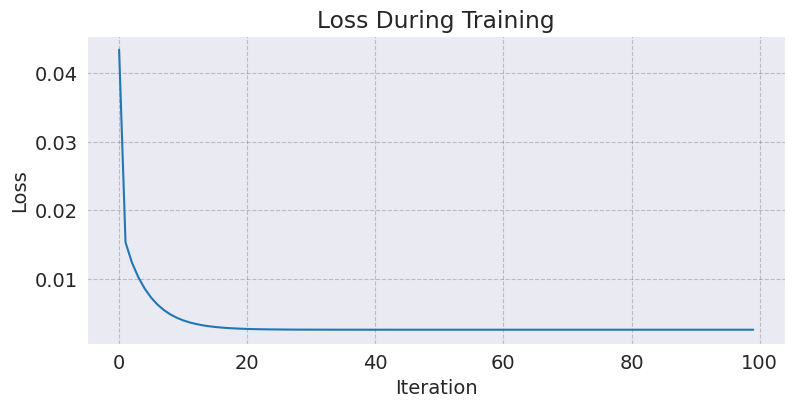

In [ ]:
# loss during training
plt.plot(range(model.n_iterations), model.losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss During Training')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.show()

In [ ]:
y_pred = model.predict(X)
y_pred[:5]

array([0.46845784, 0.42170224, 0.29075971, 0.37911743, 0.50289659])

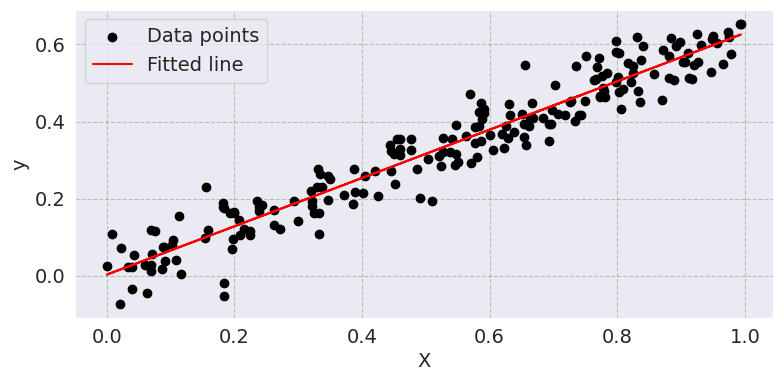

In [ ]:
# best fit line
plt.scatter(X, y, color='black', label='Data points')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, ls='--', alpha=0.2, color='black')
plt.legend()
plt.show()

In [ ]:
# mean squared error (MSE)
mse = model.mse(X, y)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.0024980928801701333


## Linear Regression: Insurance Dataset

### 2. Train/implement Linear Regression on the Insurance dataset using Sklearn, along with exploratory data analysis.

<b>Primary Goal:</b> The primary objective is to build a regression model that can predict the 'charges' (i.e., medical costs) based on the other features (age, sex, bmi, children, smoker, and region).

In [5]:
import numpy as np
import pandas as pd
# load the dataset
df = pd.read_csv('InsuranceDataset.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.

Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

Let's check the data type for each column.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age, bmi, children and charges are numbers wherese sex, smoker and region are strings

Let's look at the statistics of the data

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Exploratory Data Analysis

- To observe the shape of the <b> distribution </b> (e.g., normal, skewed, bimodal), which helps in identifying patterns or <b> anomalies </b>.

- Including a box plot as a marginal plot provides a summary of the distribution, including quartiles and <b> potential outliers </b>. It visually highlights the median, upper and lower quartiles, and any outliers outside the whiskers of the box plot.

- examining the histogram and the box plot together, you get insights into the <b> central tendency of the data (mean and median) </b>.

- making it easier to investigate specific data points or <b> ranges </b>.


In [9]:
import plotly
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# For beautification purposes
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 4)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Age
Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year)

In [11]:
fig = px.histogram(df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

### BMI

In [ ]:
fig = px.histogram(df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

### Charges
Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

In [ ]:
fig = px.histogram(df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

### Smoker

In [ ]:
px.histogram(df, x='smoker', title='Smoker')

### Smoking and Charges

This process helps in understanding and comparing the average medical charges between smokers and non-smokers, providing insights into the impact of smoking status on insurance charges.

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
{'no': 8434.268297856202, 'yes': 32050.23183153285}


<BarContainer object of 2 artists>

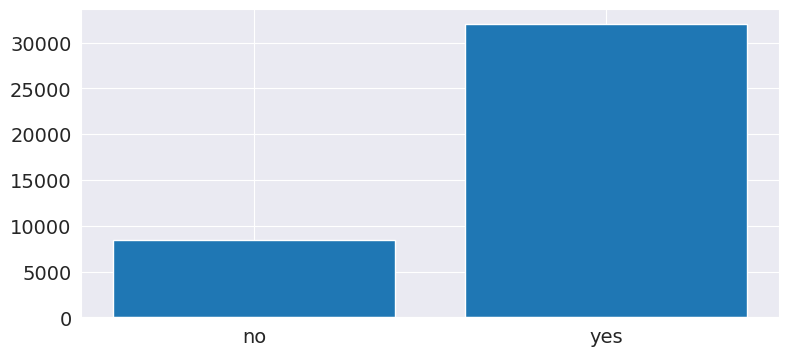

In [ ]:
df_mean_val = df.groupby('smoker')['charges'].mean()
print(df_mean_val)

df_mean_val = df_mean_val.to_dict()
print(df_mean_val)

names, counts = zip(*df_mean_val.items())
plt.bar(names, counts)

Having looked at individual columns, we can now visualize the relationship between "charges" (the value we wish to predict) and other columns.

### Age and Charges

Let's visualize the relationship between "age" and "charges" using a scatter plot. Each point in the scatter plot represents one customer. We'll also use values in the "smoker" column to color the points.

In [ ]:
fig = px.scatter(df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

We can make the following observations from the above chart:

* The general trend seems to be that medical charges increase with age, as we might expect. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.


* We can see three "clusters" of points, each of which seems to form a line with an increasing slope:

     1. The first and the largest cluster consists primary of presumably "healthy non-smokers" who have relatively low medical charges compared to others
     
     2. The second cluster contains a mix of smokers and non-smokers. It's possible that these are actually two distinct but overlapping clusters: "non-smokers with medical issues" and "smokers without major medical issues".
     
     3. The final cluster consists exclusively of smokers, presumably smokers with major medical issues that are possibly related to or worsened by smoking.

### BMI and Charges

Let's visualize the relationship between BMI (body mass index) and charges using another scatter plot. Once again, we'll use the values from the "smoker" column to color the points.

In [ ]:
fig = px.scatter(df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical charges. However, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Convert categorical variables to numerical

In [26]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

### Binary variables

In [27]:
# smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [28]:
smoker_codes = {'yes':1, 'no':0}
df['smoker'] = df['smoker'].map(smoker_codes)

In [29]:
df['smoker'].unique()

array([1, 0])

In [30]:
# sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [31]:
sex_codes = {'female':0, 'male':1}
df['sex'] = df['sex'].map(sex_codes)

In [32]:
df['sex'].unique()

array([0, 1])

### Non-binary variables - One Hot Encoding

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
# region
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [34]:
region_one_hot = enc.transform(df[['region']])

In [35]:
region_one_hot

<1338x4 sparse matrix of type '<class 'numpy.float64'>'
	with 1338 stored elements in Compressed Sparse Row format>

In [36]:
region_one_hot.toarray()

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [37]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = region_one_hot.toarray()

In [38]:
df.head()

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0


In [39]:
df.drop(columns=['region'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   float64
 7   northwest  1338 non-null   float64
 8   southeast  1338 non-null   float64
 9   southwest  1338 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 104.7 KB


## Correlation

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

This relationship is often expressed numerically using a measure called the _correlation coefficient_, which can be computed using the `.corr` method of a Pandas series.

Here's how correlation coefficients can be interpreted ([source](https://statisticsbyjim.com/basics/correlations)):

[source](https://www.cuemath.com/data/how-to-calculate-correlation-coefficient/)):

<img src="https://i.imgur.com/3XUpDlw.png" width="360">

The correlation coefficient has the following formula:

<img src="https://i.imgur.com/unapugP.png" width="360">




In [41]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

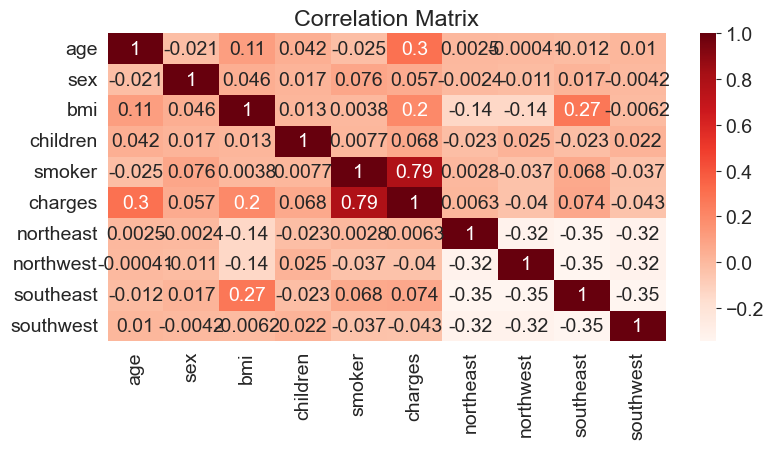

In [42]:
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [43]:
## Split the dataset into train and validation
from sklearn.model_selection import train_test_split
X = df.drop(columns=['charges'])
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

X.shape, X_train.shape, X_test.shape

((1338, 9), (1070, 9), (268, 9))

# Linear Regression using Sklearn

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

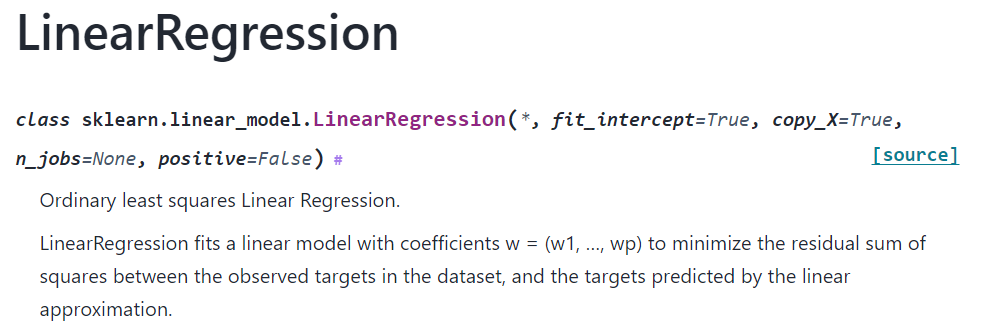

- fit_intercept=True: This argument determines whether to calculate the intercept (also known as the bias term) for the linear model.

- copy_X=True: This argument specifies whether to copy the input data X or work with it in place.

- Purpose: This argument specifies whether the coefficients of the linear model should be constrained to be non-negative.

In [45]:
model = LinearRegression(fit_intercept=True)

model.fit(X_train, y_train)

preds = model.predict(X_test)

In [46]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [47]:
rmse(y_test, preds)

np.float64(5796.2846592762735)

In [48]:
model.coef_, model.intercept_

(array([ 2.56975706e+02, -1.85916916e+01,  3.37092552e+02,  4.25278784e+02,
         2.36511289e+04,  4.59585244e+02,  8.89079180e+01, -1.98279052e+02,
        -3.50214110e+02]),
 np.float64(-12390.804294570278))

In [49]:
model.coef_ = np.random.normal(loc=0.0, scale=1.0, size=(9))
model.intercept_ = np.random.normal(loc=0.0, scale=1.0, size=None)
model.coef_, model.intercept_

(array([-0.41058871,  1.59733465, -0.10946808, -1.04681943, -0.66413578,
         0.70825742,  1.56819873, -0.3906397 , -0.63087387]),
 1.5589376992046242)

In [50]:
preds_random = model.predict(X_test)
print(rmse(y_test, preds_random))

17998.66590547515


In [ ]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,0.730133
1,sex,0.237335
2,bmi,0.586940
3,children,-0.460865
4,smoker,-0.738542
5,northeast,0.947068
6,northwest,-1.382837
7,southeast,-0.460195
8,southwest,0.830318
9,1,2.574476


## Feature Scaling

It's common practice to scale (or standardize) the values in numeric column by subtracting the mean and dividing by the standard deviation.

![](https://i.imgur.com/dT5fLFI.png)

We can apply scaling using the StandardScaler class from `scikit-learn`.

Feature scaling before training a linear regression model is essential for <b> ensuring fair contribution of features </b>, <b> improving optimization efficiency </b>, <b> preventing numerical issues </b>, and <b> making regularization and interpretability more effective </b>.

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_cols = ['age', 'bmi', 'children']

scaler.fit(X_train[numeric_cols])

StandardScaler()

In [52]:
scaler.mean_

array([39.35700935, 30.5603972 ,  1.10747664])

In [53]:
scaler.var_

array([197.89123592,  36.4883772 ,   1.47723382])

In [54]:
scaled_inputs = scaler.transform(X_train[numeric_cols])
scaled_inputs

array([[ 0.47222651, -1.75652513,  0.73433626],
       [ 0.54331294, -1.03308239, -0.91119211],
       [ 0.8987451 , -0.94368672, -0.91119211],
       ...,
       [ 1.3252637 , -0.89153925, -0.91119211],
       [-0.16755139,  2.82086429,  0.73433626],
       [ 1.1120044 , -0.10932713, -0.91119211]])

In [56]:
scaled_test = scaler.transform(X_test[numeric_cols])

In [57]:
X_train[numeric_cols] = scaled_inputs
X_test[numeric_cols] = scaled_test

In [58]:
model_scaled = LinearRegression()

In [60]:
model_scaled.fit(X_train, y_train)

LinearRegression()

In [61]:
preds1 = model_scaled.predict(X_test)


In [62]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [63]:
rmse(y_test, preds1)

np.float64(5796.2846592762735)

- The magnitude of MSE depends on the scale of the target variable

In [64]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
4,smoker,23651.128856
9,1,8495.659557
0,age,3614.975415
2,bmi,2036.228123
3,children,516.890247
5,northeast,459.585244
6,northwest,88.907918
1,sex,-18.591692
7,southeast,-198.279052
8,southwest,-350.214110


# Logistic Regression

### 3. Train/implement Logistic Regression on a synthetic dataset, without using Sklearn.

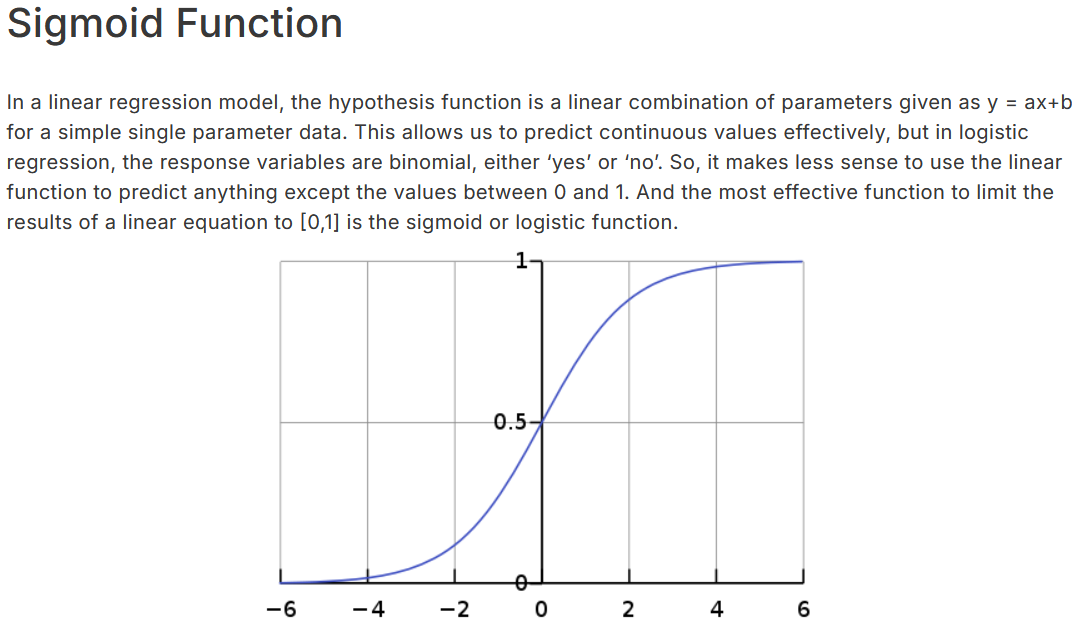

The <b> sigmoid function </b> in logistic regression is used to <b> convert the raw output of the linear model into a probability value between 0 and 1 </b>. This probability can then be used for binary classification tasks, providing a probabilistic interpretation of the predictions and allowing for effective classification based on a chosen threshold.

(i) Binary Cross-Entropy Loss / Log Loss:

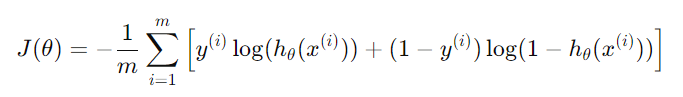

(ii) Derivative of J(Θ):

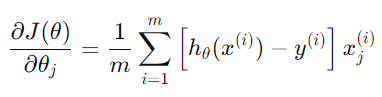

(iii) Updating the weights using gradient descent update rule:

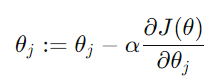

In [ ]:
#Import libraries for Logistic Regression
import numpy as np
from numpy import log,dot,exp,shape
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X,y = make_classification(n_features=4)
from sklearn.model_selection import train_test_split

#Generates a random classification dataset with 4 features (independent variables). X contains the features, and y contains the corresponding labels (target variable).
X_tr,X_te,y_tr,y_te = train_test_split(X,y,test_size=0.1)

#Standardizes each feature by subtracting the mean and dividing by the standard deviation. This ensures the features have a mean of 0 and a standard deviation of 1.
def standardize(X_tr):
    for i in range(shape(X_tr)[1]):
        X_tr[:,i] = (X_tr[:,i] - np.mean(X_tr[:,i]))/np.std(X_tr[:,i])


def F1_score(y,y_hat):
    tp,tn,fp,fn = 0,0,0,0
    for i in range(len(y)):
        if y[i] == 1 and y_hat[i] == 1: #Counts true positives where both the true label and predicted label are 1.
            tp += 1
        elif y[i] == 1 and y_hat[i] == 0: #Counts false negatives
            fn += 1
        elif y[i] == 0 and y_hat[i] == 1: #Counts false positives
            fp += 1
        elif y[i] == 0 and y_hat[i] == 0: #Counts true negatives
            tn += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    f1_score = 2*precision*recall/(precision+recall)
    return f1_score


class LogisticRegression:

    def sigmoid(self,z):   #Defines a method sigmoid to calculate the sigmoid function, which maps any real-valued number to a value between 0 and 1.
        sig = 1/(1+exp(-z))
        return sig


    def initialize(self,X):   # Defines a method initialize to initialize the weights and add a bias term to the input features.
        weights = np.zeros((shape(X)[1]+1,1))  # Initializes the weights to zeros, with an extra dimension for the bias term.
        X = np.c_[np.ones((shape(X)[0],1)),X]  # Adds a column of ones to X for the bias term.
        return weights,X


    def fit(self,X,y,alpha=0.001,iter=400):  #Defines a method fit to train the logistic regression model using gradient descent.
       
        weights,X = self.initialize(X)   #to get the initial weights and the modified input features.
        def cost(theta):      # Defines a nested function cost to calculate the cost (loss) for the current weights (i.e., Binary Cross Entropy / Log loss)
            z = dot(X,theta)  # Computes the linear combination of inputs and weights.
            cost0 = y.T.dot(log(self.sigmoid(z)))  # Computes the cost for the cases where the true label is 1.
            cost1 = (1-y).T.dot(log(1-self.sigmoid(z))) # Computes the cost for the cases where the true label is 0.
            cost = -((cost1 + cost0))/len(y)
            return cost
        cost_list = np.zeros(iter,) # Initializes a list to store the cost at each iteration.
        for i in range(iter):
            weights = weights - alpha*dot(X.T,self.sigmoid(dot(X,weights))-np.reshape(y,(len(y),1))) # Updates the weights using the gradient descent formula.
            cost_list[i] = cost(weights)
        self.weights = weights
        return cost_list


    def predict(self,X):        #Using the learned parameters to predict the unseen data
        z = dot(self.initialize(X)[1],self.weights) # z= W.x+b
        lis = []
        for i in self.sigmoid(z):#For each probability i, if it is greater than 0.5, the corresponding label is predicted as 1 (indicating the positive class).
            if i>0.5:
                lis.append(1)
            else:
                lis.append(0)
        return lis

standardize(X_tr)
standardize(X_te)

obj1 = LogisticRegression()
model= obj1.fit(X_tr,y_tr)
y_pred = obj1.predict(X_te)
y_train = obj1.predict(X_tr)
#Let's see the f1-score for training and testing data
f1_score_tr = F1_score(y_tr,y_train)
f1_score_te = F1_score(y_te,y_pred)
print(f1_score_tr)
print(f1_score_te)

0.9411764705882353
0.6666666666666666


<ipython-input-190-3f1ad5d5ca05>:59: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



# Using sklearn’s logistic regression.

4. Train/implement Logistic Regression on a synthetic dataset, using Sklearn.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

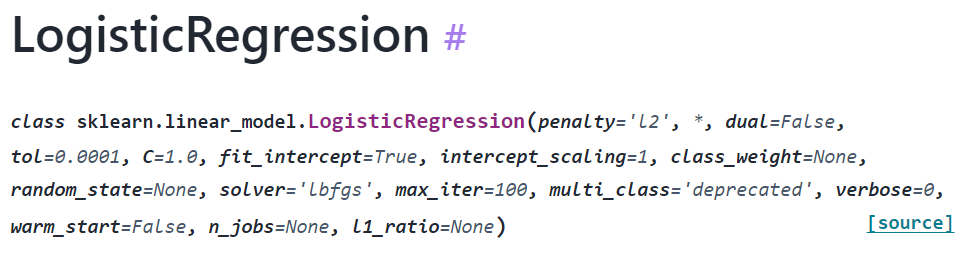

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
model = LogisticRegression().fit(X_tr,y_tr)
y_pred = model.predict(X_te)
print(f1_score(y_te,y_pred))

0.6666666666666666


## Assignment Question 1: Logistic Regression with Scikit-Learn (5 Marks)

<b> Question: </b>

You are provided with the Pima Indians Diabetes dataset, a dataset that contains several medical predictor variables and one target variable indicating whether or not a patient has diabetes. Your task is to use the Logistic Regression algorithm to predict whether a patient has diabetes based on the provided features <b> using the scikit-learn library. </b>

Instructions:

<b> 1. Data Loading and Preparation: </b> [1 mark]

- Use the dataset available at this Kaggle link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

- Ensure the dataset is properly split into features (X) and target (y).

- Perform feature scaling using 'StandardScaler' to normalize the features for better performance of the logistic regression model.


<b> 2. Model Implementation: </b> [2 marks]

- Split the dataset into training and testing sets (e.g., 80% training, 20% testing) using train_test_split.
- Implement the Logistic Regression classifier using 'sklearn.linear_model.LogisticRegression'.
- Train the Logistic Regression model on the training set.


<b> 3. Evaluation: </b>  [1.5 marks]

- Evaluate the model's performance on the test set using accuracy, precision, recall, and F1-score.
- Present a classification report and a confusion matrix for the results.

<b> 4. Submission Requirements: </b> [0.5 mark]

- Submit the Python code implementing the solution.
- Provide a brief report (300-500 words) explaining your approach, the preprocessing steps, feature scaling importance, and the results obtained.




## References:

1. https://www.linkedin.com/pulse/perceptron-based-linear-regression-model-hemant-thapa-dpg3e/
2. https://www.analyticsvidhya.com/blog/2022/02/implementing-logistic-regression-from-scratch-using-python/